<a href="https://colab.research.google.com/github/camylaand/Previsao-de-projetos-finalizados-com-SVM/blob/main/Treino_ML_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
uri = "https://gist.githubusercontent.com/guilhermesilveira/12291c548acaf544596795709020e3db/raw/325bdef098bd9cbc2189215b7e32e22f437f29f3/projetos.csv"

In [ ]:
dados = pd.read_csv(uri)
dados.head()

,nao_finalizado,horas_esperadas,preco
0,0,75.0,6985.000000
1,1,0.0,4325.293458
2,0,87.0,14205.000000
3,1,13.0,100.000000
4,0,2.0,202.000000


In [ ]:
dados["finalizados"] = dados["nao_finalizado"].map({1: 0, 0:1})
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizados
0,0,75.0,6985.000000,1
1,1,0.0,4325.293458,0
2,0,87.0,14205.000000,1
3,1,13.0,100.000000,0
4,0,2.0,202.000000,1


<Axes: xlabel='horas_esperadas', ylabel='preco'>

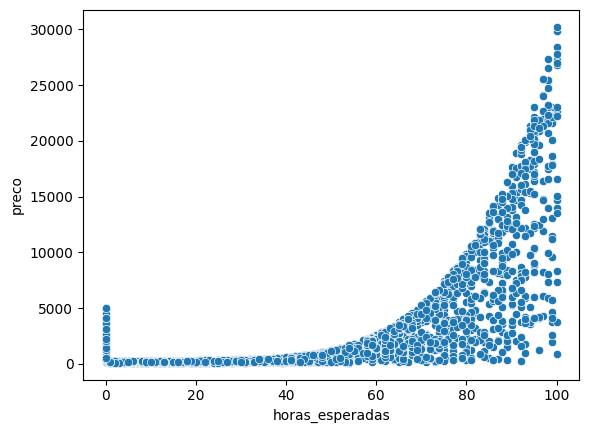

In [ ]:
import seaborn as sns

sns.scatterplot(x = "horas_esperadas", y = "preco", data=dados)

<Axes: xlabel='horas_esperadas', ylabel='preco'>

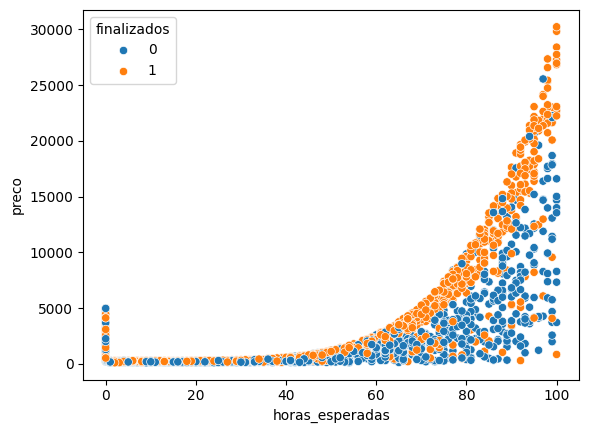

In [ ]:
sns.scatterplot(x = "horas_esperadas", y = "preco", data=dados, hue="finalizados")

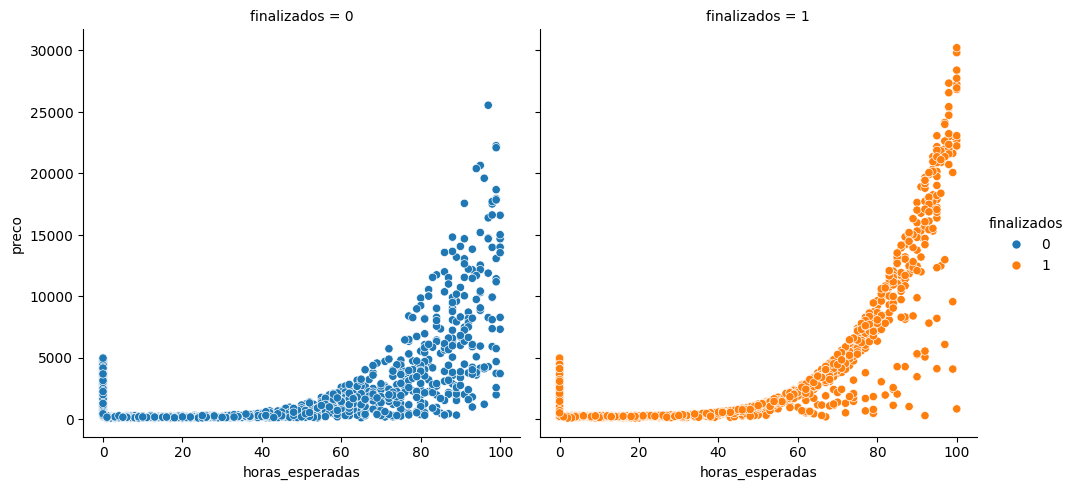

In [ ]:
sns.relplot(x = "horas_esperadas", y = "preco", data=dados, hue="finalizados", col = "finalizados")

In [ ]:
#jogar foras as linhas com horas_esepradas = 0
dados = dados.query("horas_esperadas > 0")
dados.head()

,nao_finalizado,horas_esperadas,preco,finalizados
0,0,75.0,6985.0,1
2,0,87.0,14205.0,1
3,1,13.0,100.0,0
4,0,2.0,202.0,1
5,0,49.0,1096.0,1


In [ ]:
x = dados[["horas_esperadas", "preco"]]
y = dados["finalizados"]

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, random_state = SEED, stratify=y)

print(f"Treinaremos com {len(treino_x)} elemnetos")
print(f"Treinaremos com {len(teste_x)} elemnetos")

modelo = LinearSVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 1617 elemnetos
Treinaremos com 540 elemnetos
A acurácia foi de 60.56%


In [ ]:
previsoes_de_base = teste_y.sum() / len(teste_y) * 100
print(f"A acurácia do modelo de base foi de {previsoes_de_base:.2f}%")

A acurácia do modelo de base foi de 52.59%


In [ ]:
x_minimo = teste_x["horas_esperadas"].min()
x_maximo = teste_x["horas_esperadas"].max()

y_minimo = teste_x["preco"].min()
y_maximo = teste_x["preco"].max()
print(f'x_minimo: {x_minimo}')
print(f'x_maximo: {x_maximo}')
print(f'y_minimo: {y_minimo}')
print(f'y_maximo: {y_maximo}')

x_minimo: 1.0
x_maximo: 100.0
y_minimo: 102.0
y_maximo: 30223.0


In [ ]:
import numpy as np
pixels = 100
eixo_x = np.arange(x_minimo, x_maximo, (x_maximo - x_minimo) / pixels)
eixo_y = np.arange(y_minimo, y_maximo, (y_maximo - y_minimo) / pixels)
eixo_y

array([  102.  ,   403.21,   704.42,  1005.63,  1306.84,  1608.05,
        1909.26,  2210.47,  2511.68,  2812.89,  3114.1 ,  3415.31,
        3716.52,  4017.73,  4318.94,  4620.15,  4921.36,  5222.57,
        5523.78,  5824.99,  6126.2 ,  6427.41,  6728.62,  7029.83,
        7331.04,  7632.25,  7933.46,  8234.67,  8535.88,  8837.09,
        9138.3 ,  9439.51,  9740.72, 10041.93, 10343.14, 10644.35,
       10945.56, 11246.77, 11547.98, 11849.19, 12150.4 , 12451.61,
       12752.82, 13054.03, 13355.24, 13656.45, 13957.66, 14258.87,
       14560.08, 14861.29, 15162.5 , 15463.71, 15764.92, 16066.13,
       16367.34, 16668.55, 16969.76, 17270.97, 17572.18, 17873.39,
       18174.6 , 18475.81, 18777.02, 19078.23, 19379.44, 19680.65,
       19981.86, 20283.07, 20584.28, 20885.49, 21186.7 , 21487.91,
       21789.12, 22090.33, 22391.54, 22692.75, 22993.96, 23295.17,
       23596.38, 23897.59, 24198.8 , 24500.01, 24801.22, 25102.43,
       25403.64, 25704.85, 26006.06, 26307.27, 26608.48, 26909

In [ ]:
xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.020000e+02],
       [1.990000e+00, 1.020000e+02],
       [2.980000e+00, 1.020000e+02],
       ...,
       [9.703000e+01, 2.992179e+04],
       [9.802000e+01, 2.992179e+04],
       [9.901000e+01, 2.992179e+04]])

In [ ]:
z = modelo.predict(pontos)
z = z.reshape(xx.shape)
z

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


array([[1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 0],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]])

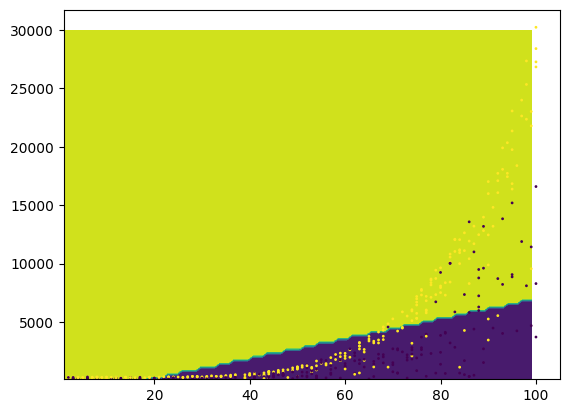

In [ ]:
import matplotlib.pyplot as plt

plt.contourf(xx, yy, z)
plt.scatter(teste_x["horas_esperadas"], teste_x["preco"], c=teste_y, s=1)


SVC

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

SEED = 20

treino_x, teste_x, treino_y, teste_y = train_test_split(x,y, random_state = SEED, stratify=y)

print(f"Treinaremos com {len(treino_x)} elementos")
print(f"Treinaremos com {len(teste_x)} elementos")

modelo = SVC(gamma = 'auto')
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 1617 elementos
Treinaremos com 540 elemen  tos
A acurácia foi de 57.78%


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


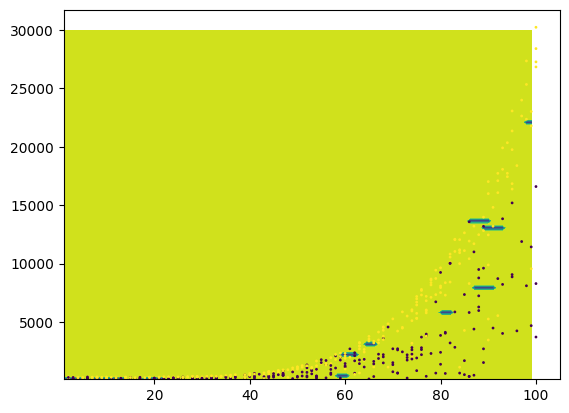

In [ ]:
x_minimo = teste_x["horas_esperadas"].min()
x_maximo = teste_x["horas_esperadas"].max()
y_minimo = teste_x["preco"].min()
y_maximo = teste_x["preco"].max()

pixels = 100
eixo_x = np.arange(x_minimo, x_maximo, (x_maximo - x_minimo) / pixels)
eixo_y = np.arange(y_minimo, y_maximo, (y_maximo - y_minimo) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

z = modelo.predict(pontos)
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z)
plt.scatter(teste_x["horas_esperadas"], teste_x["preco"], c=teste_y, s=1)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

SEED = 20

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x,y, random_state = SEED, stratify=y)

print(f"Treinaremos com {len(raw_treino_x)} elementos")
print(f"Treinaremos com {len(raw_teste_x)} elementos")

scaler = StandardScaler()
scaler.fit(raw_treino_x)

treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)


modelo = SVC(gamma = 'auto')
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)

acuracia = accuracy_score(teste_y, previsoes) * 100
print(f"A acurácia foi de {acuracia:.2f}%")

Treinaremos com 1617 elementos
Treinaremos com 540 elementos
A acurácia foi de 68.52%


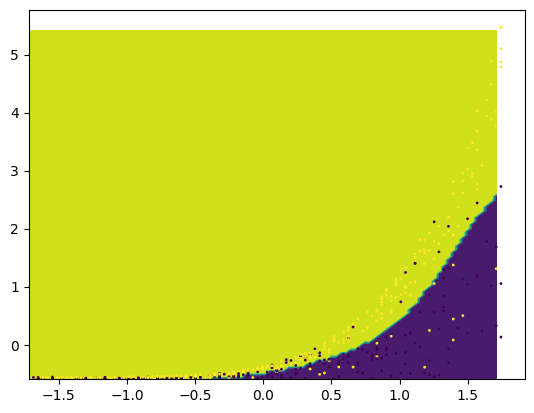

In [ ]:
data_col1 = teste_x[:, 0]
data_col2 = teste_x[:, 1]

x_minimo = data_col1.min()
x_maximo = data_col1.max()
y_minimo = data_col2.min()
y_maximo = data_col2.max()

pixels = 100
eixo_x = np.arange(x_minimo, x_maximo, (x_maximo - x_minimo) / pixels)
eixo_y = np.arange(y_minimo, y_maximo, (y_maximo - y_minimo) / pixels)

xx, yy = np.meshgrid(eixo_x, eixo_y)
pontos = np.c_[xx.ravel(), yy.ravel()]

z = modelo.predict(pontos)
z = z.reshape(xx.shape)

plt.contourf(xx, yy, z)
plt.scatter(data_col1, data_col2, c=teste_y, s=1)